## BUSINESS UNDERSTANDING
### Introduction
Apple and Google have been constantly innovating and changing their products, services, and customer experiences. This has led to a surge in customer feedback and a need for companies to analyze and understand the sentiments expressed by their users. Tweets provide a unique platform for companies to gather feedback and respond to their customers, which can be a valuable resource for understanding consumer behavior and making data-driven decisions. This project aims to analyze the sentiments expressed in tweets about Apple and Google products.

### Problem Statement
Accurately classifying the sentiments expressed in tweets about topics or brands into specific classes- positive, negative or neutral is a huge challenge for companies like Apple and Google. Given the diverse nature of informal data, with its use of slang, abbreviations, coming up with a reliable sentiment analysis model that can effectively interpret and classify the tweets can be a complex task. Getting this task right provides a wide variety of novel information for a company like Apple by providing insights and creating better understanding overall of how consumers interact with products/brands.

### Data Understanding
Contributors evaluated tweets about multiple brands and products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed they were also asked to say which brand or product was the target of that emotion.

The dataset contains the following columns:

1. 'tweet_text' column: Contains the text of the tweet.
2. 'emotion_in_tweet_is_directed_at' column: Contains the person or entity or brand that the tweet is directed at.
3. 'is_there_an_emotion_directed_at_a_brand_or_product' column: Indicates the kind of emotion in the tweet directed at the brand or product

The dataset has a total of 9093 data points.

### Objective
To build a model that can rate the sentiment of a tweet based on its content.

## 1. Load the Data with Pandas
In the cell below, we:

Importing all the necessary libraries.

In [1]:
import re
import nltk
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from string import punctuation
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.tokenize import regexp_tokenize, word_tokenize,TweetTokenizer, RegexpTokenizer

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In the cell below, `judge.csv` as `df`:

In [3]:
#load the datasetcsv
df = pd.read_csv('judge.csv', encoding='iso-8859-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In this cell rename the column names to most relevant names. 

In [4]:
# function to rename the column names
def rename_columns(df, columns_dict):
    """
   Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be renamed.
    columns_dict (dict): A dictionary where keys are current column names and values are the new column names.
    """
    df.rename(columns=columns_dict, inplace=True)
    return df

# Define the dictionary for renaming columns
columns_dict = {
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'target_entity',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'
}

# Rename columns using the dictionary
df = rename_columns(df, columns_dict)
df

,tweet,target_entity,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Now you want to get familiar with the data. This step includes:

* Understanding the dimensionality of your dataset

* Investigating what type of data it contains, and the data types used to store it

* Discovering how missing values are encoded, and how many there are

* Getting a feel for what information it does and doesn't contain

* check the existing columns

In [5]:
df.shape

(9093, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9092 non-null   object
 1   target_entity  3291 non-null   object
 2   emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
df.columns

Index(['tweet', 'target_entity', 'emotion'], dtype='object')

## Data Cleaning

Look out for missing values and try to figure out how we can handle them

In [8]:
# Check missing values
df.isna().sum()

tweet               1
target_entity    5802
emotion             0
dtype: int64

What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

* Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")

* Drop rows with missing values

The whole dataset has 9093 rows and the highest column having missing values is `target_entity` which has 5802 missing values which is about 63.81% of our data.

we see that the null values have a very high impact on our data set therefore we decide to replace the rows with a placeholder.

Now, implement the strategy to fill in with missing values using code and drop duplicate entries

In [9]:
#Removing Null Tweets, Removing Duplicate entries and Filling in missing Item Values

#Removing 1 null 'Tweet' Entry
df.dropna(subset = ['tweet'], inplace=True)

#Removing Duplicates
df.drop_duplicates(inplace=True)

#Filling in Null "Item" categories with "Uncategorized"
df['target_entity'].fillna('Uncategorized', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9070 non-null   object
 1   target_entity  9070 non-null   object
 2   emotion        9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB


Text Cleaning: The function below cleans the tweet column by removing white spaces, converting to lower case, and removing special characters.

In [10]:
def clean_text(text):
    #if not isinstance(text, str):
        #return ""
    text = text.strip()
    text = text.lower()
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = pattern.sub('', text)
    return text

# Apply the clean_text function to the tweet column
df['cleaned_tweet'] = df['tweet'].apply(clean_text)
df.head()

,tweet,target_entity,emotion,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphon...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...


### Tokenisation

It is done to break down the text into smaller units like sentences or words, depending on the task.

In [11]:
#we'll make use of the tokenizer in the nltk library
#NLTK is a popular open-source library specifically designed for Python.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Function to tokenize text
def tokenize_text(cleaned_tweet):
    return word_tokenize(cleaned_tweet)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Apply the tokenize_tweet function to the cleaned tweet column
df['tokenized_tweet'] = df['cleaned_tweet'].apply(word_tokenize)
df.head()

,tweet,target_entity,emotion,cleaned_tweet,tokenized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris..."


### Removing Stop Words
Stop words are commonly used words in a language (like "the", "a", "an", "is") that carry little meaning on their own

Stop words are often removed during pre-processing because they can add noise to the data

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) #here we are getting a list of stopwords.

def remove_stopwords(tokenized_tweet):
    return [word for word in tokenized_tweet if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# display nostop tweets
df['nostop_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df.head()

,tweet,target_entity,emotion,cleaned_tweet,tokenized_tweet,nostop_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, risea..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


### Lemmatization
Lemmatization is generally preferred for tasks where preserving the word's meaning and part of speech is crucial.

In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(nostop_tweet):
    return [lemmatizer.lemmatize(word) for word in nostop_tweet]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
df['lemmatized_tweet'] = df['nostop_tweet'].apply(lemmatize_text)
df.head()

,tweet,target_entity,emotion,cleaned_tweet,tokenized_tweet,nostop_tweet,lemmatized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, risea...","[wesley83, 3g, iphone, 3, hr, tweeting, riseau..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale, sxsw]","[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festival, isnt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...","[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [17]:
df.sample(10)

,tweet,target_entity,emotion,cleaned_tweet,tokenized_tweet,nostop_tweet,lemmatized_tweet
4340,Hmm. RT @mention We interrupt your regularly s...,Uncategorized,No emotion toward brand or product,hmm rt mention we interrupt your regularly sch...,"[hmm, rt, mention, we, interrupt, your, regula...","[hmm, rt, mention, interrupt, regularly, sched...","[hmm, rt, mention, interrupt, regularly, sched..."
8315,Free &quot;Payments on the #Android Platform&q...,Uncategorized,No emotion toward brand or product,free quotpayments on the android platformquot ...,"[free, quotpayments, on, the, android, platfor...","[free, quotpayments, android, platformquot, we...","[free, quotpayments, android, platformquot, we..."
1092,There are so many ppl w/ Apple products at #SX...,Uncategorized,Positive emotion,there are so many ppl w apple products at sxsw...,"[there, are, so, many, ppl, w, apple, products...","[many, ppl, w, apple, products, sxsw, think, h...","[many, ppl, w, apple, product, sxsw, think, he..."
4846,we need to get ipad 2! @mention Apple opening ...,iPad,Positive emotion,we need to get ipad 2 mention apple opening up...,"[we, need, to, get, ipad, 2, mention, apple, o...","[need, get, ipad, 2, mention, apple, opening, ...","[need, get, ipad, 2, mention, apple, opening, ..."
5101,RT @mention @mention @mention Google to launch...,Uncategorized,No emotion toward brand or product,rt mention mention mention google to launch so...,"[rt, mention, mention, mention, google, to, la...","[rt, mention, mention, mention, google, launch...","[rt, mention, mention, mention, google, launch..."
5476,RT @mention Apple to Open Pop-Up Shop at SXSW ...,Uncategorized,Positive emotion,rt mention apple to open popup shop at sxsw re...,"[rt, mention, apple, to, open, popup, shop, at...","[rt, mention, apple, open, popup, shop, sxsw, ...","[rt, mention, apple, open, popup, shop, sxsw, ..."
3679,Wandered in on Google Doodles presentation to ...,Other Google product or service,Positive emotion,wandered in on google doodles presentation to ...,"[wandered, in, on, google, doodles, presentati...","[wandered, google, doodles, presentation, see,...","[wandered, google, doodle, presentation, see, ..."
7272,Anyone know the hours of the Apple pop-up stor...,Uncategorized,No emotion toward brand or product,anyone know the hours of the apple popup store...,"[anyone, know, the, hours, of, the, apple, pop...","[anyone, know, hours, apple, popup, store, aus...","[anyone, know, hour, apple, popup, store, aust..."
426,Mobile is definitely the hot topic this year. ...,Uncategorized,No emotion toward brand or product,mobile is definitely the hot topic this year e...,"[mobile, is, definitely, the, hot, topic, this...","[mobile, definitely, hot, topic, year, every, ...","[mobile, definitely, hot, topic, year, every, ..."
2216,Marissa Mayer talks the future of Google maps ...,Other Google product or service,Positive emotion,marissa mayer talks the future of google maps ...,"[marissa, mayer, talks, the, future, of, googl...","[marissa, mayer, talks, future, google, maps, ...","[marissa, mayer, talk, future, google, map, di..."


##  EXPLORATORY DATA ANALYSIS

This involves understanding the characteristics of the text data, identifying patterns, and uncovering potential challenges. By performing EDA, we gain valuable insights into the dataset, inform feature engineering decisions, and build more effective NLP models. This exploratory phase helps to prevent potential pitfalls and ensures that subsequent modeling efforts are grounded in a solid understanding of the data.

We can begin with finding the number of words in the document. In our case, it would be the "Tweet" column. To do this, we can write a function to find out, then find the description of the word count, such as mean, mode.

In [18]:
def count_words(text):
    """Counts the number of words in a given text."""
    words = text.split()
    return len(words)

In [19]:
df['word_count'] = df['tweet'].apply(count_words)
df

,tweet,target_entity,emotion,cleaned_tweet,tokenized_tweet,nostop_tweet,lemmatized_tweet,word_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, risea...","[wesley83, 3g, iphone, 3, hr, tweeting, riseau...",23
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,...",22
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale, sxsw]","[swonderlin, wait, ipad, 2, also, sale, sxsw]",15
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festival, isnt, crashy, yea...",15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...",17
...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,"[ipad, everywhere, sxsw, link]","[ipad, everywhere, sxsw, link]","[ipad, everywhere, sxsw, link]",4
9089,"Wave, buzz... RT @mention We interrupt your re...",Uncategorized,No emotion toward brand or product,wave buzz rt mention we interrupt your regular...,"[wave, buzz, rt, mention, we, interrupt, your,...","[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, rt, mention, interrupt, regularly...",18
9090,"Google's Zeiger, a physician never reported po...",Uncategorized,No emotion toward brand or product,googles zeiger a physician never reported pote...,"[googles, zeiger, a, physician, never, reporte...","[googles, zeiger, physician, never, reported, ...","[google, zeiger, physician, never, reported, p...",19
9091,Some Verizon iPhone customers complained their...,Uncategorized,No emotion toward brand or product,some verizon iphone customers complained their...,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphone, customer, complained, time, ...",23


In [20]:
df['word_count'].describe()

count    9070.000000
mean       17.765932
std         4.962136
min         2.000000
25%        14.000000
50%        18.000000
75%        21.000000
max        33.000000
Name: word_count, dtype: float64

We can easily visualize it with a histogram that focuses on grouped distrubution to avoid visual clatter

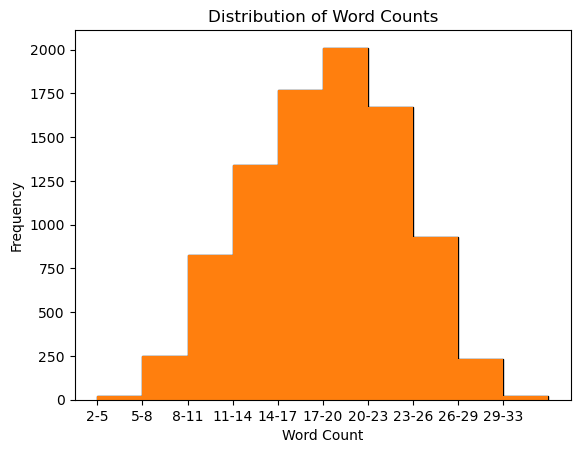

In [21]:
# Histogram
plt.hist(df['word_count'], bins=10, edgecolor='black')

# Calculate bin edges
counts, bins, patches = plt.hist(df['word_count'], bins=10)

# Create bin labels
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

# Set x-axis labels
plt.xticks(bins[:-1], bin_labels)

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()

Visually, our data tells us that most of the words in the document lie between 17-20 words. But we need to find out the statistics of usage of each of the words in the document. For this, we can count each word in the "Tweet" column. This is easily accomplished by going through all the words in the column, the calculating word frequencies and visually displaying it

In [22]:
from collections import Counter

all_words = [word for sublist in df['lemmatized_tweet'] for word in sublist]

# Calculate word frequencies
word_counts = Counter(all_words)

# Convert word counts to a DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

word_freq_df.describe()

,count
count,10010.000000
mean,11.185415
std,141.139467
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9486.000000


<Figure size 1200x600 with 0 Axes>

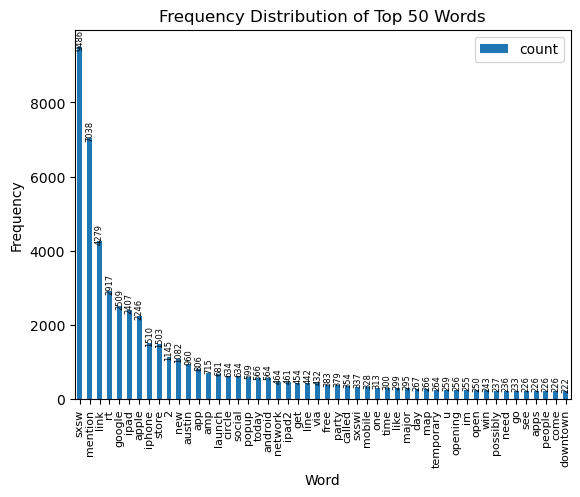

In [23]:
# Visualize the top 50 words
plt.figure(figsize=(12, 6))
ax = word_freq_df[:50].plot(x='word', y='count', kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points',
                fontsize=6,  # Adjust font size here
                rotation=90)  # Adjust rotation here

#word_freq_df[:40].plot(x='word', y='count', kind='bar')
plt.title('Frequency Distribution of Top 50 Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(
    rotation = 90,
    fontsize = 8)
plt.show();

For those who may need a better visualization medium, we can use a wordcloud

A word cloud is a visual representation of text data where words are sized proportionally to their frequency of occurrence in a given document or corpus. It provides a rapid overview of the most prominent terms, allowing for quick identification of key topics and themes. Word clouds are particularly effective when dealing with large volumes of text data, as they can condense information into a visually appealing format.

We can use the lemmatized_tweet column to generate a wordcloud

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


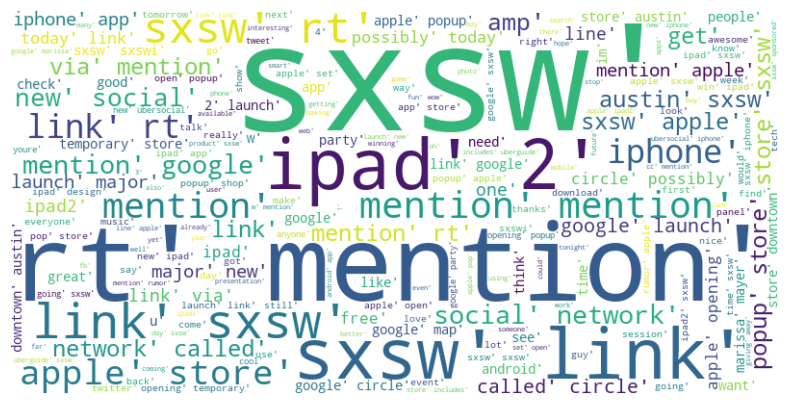

In [25]:
from wordcloud import WordCloud

text = ' '.join(df['lemmatized_tweet'].astype(str))
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can also use a bit of sentiment analysis to determine the positivity, negativity or neutrality of a tweet. We can use a library called TextBlob, as it returns a numerical value, ranging from -1 to 1, where -1 indicates negativity, whle 1 indicates positivity. 0 indicates neutrality

In [26]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


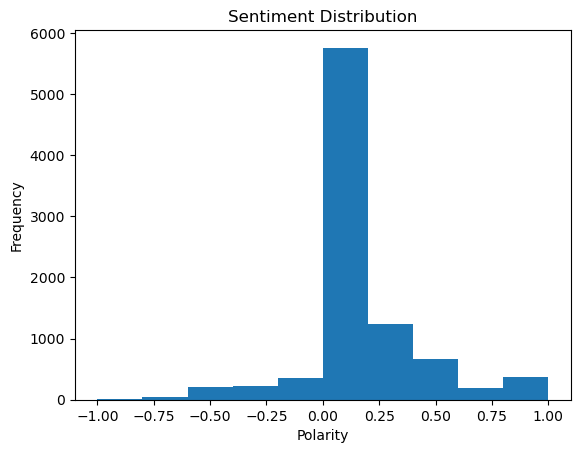

In [27]:
from textblob import TextBlob

df['polarity'] = df['lemmatized_tweet'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.hist(df['polarity'], bins=10)
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

In [28]:
df

,tweet,target_entity,emotion,cleaned_tweet,tokenized_tweet,nostop_tweet,lemmatized_tweet,word_count,polarity
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, risea...","[wesley83, 3g, iphone, 3, hr, tweeting, riseau...",23,-0.200000
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,...",22,0.466667
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale, sxsw]","[swonderlin, wait, ipad, 2, also, sale, sxsw]",15,0.000000
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festival, isnt, crashy, yea...",15,0.000000
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...",17,0.800000
...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,"[ipad, everywhere, sxsw, link]","[ipad, everywhere, sxsw, link]","[ipad, everywhere, sxsw, link]",4,0.000000
9089,"Wave, buzz... RT @mention We interrupt your re...",Uncategorized,No emotion toward brand or product,wave buzz rt mention we interrupt your regular...,"[wave, buzz, rt, mention, we, interrupt, your,...","[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, rt, mention, interrupt, regularly...",18,0.000000
9090,"Google's Zeiger, a physician never reported po...",Uncategorized,No emotion toward brand or product,googles zeiger a physician never reported pote...,"[googles, zeiger, a, physician, never, reporte...","[googles, zeiger, physician, never, reported, ...","[google, zeiger, physician, never, reported, p...",19,0.000000
9091,Some Verizon iPhone customers complained their...,Uncategorized,No emotion toward brand or product,some verizon iphone customers complained their...,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphone, customer, complained, time, ...",23,-0.054545


As seen, most of the words lie near the zero mark. But we can go even further. We can use tokens and their tags to find out where most of the words lie in the parts of speech. This is known as parts-of-speech tagging(POS tagging) These tags indicate the syntactic role of a word, such as whether it's a noun, verb, adjective, adverb, and so on.

How POS Tagging Works

* Tokenization: The text is broken down into individual words or tokens.
* Tagging: Each token is assigned a POS tag based on its context and the rules of the language.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


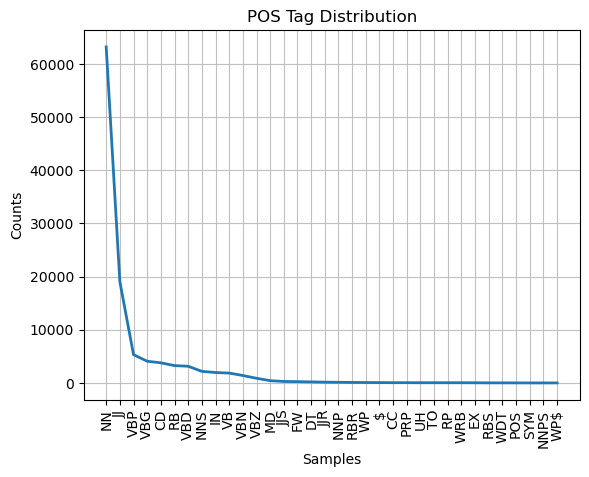

<Axes: title={'center': 'POS Tag Distribution'}, xlabel='Samples', ylabel='Counts'>

In [29]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

tokens = [token for tokens in df['lemmatized_tweet'] for token in tokens]
tagged = pos_tag(tokens)

# Extract POS tags
pos_tags = [tag[1] for tag in tagged]

# Count POS tag frequencies
fdist = nltk.FreqDist(pos_tags)

# Plot POS tag distribution
#plt.figure(figsize=(10, 5))
plt.title('POS Tag Distribution')
fdist.plot()
#plt.title('POS Tag Distribution')
#plt.show()

in the target entities column, we focus on what services the tweets refer to. We can use the describe() function to find out on the info of the column and plot the entities

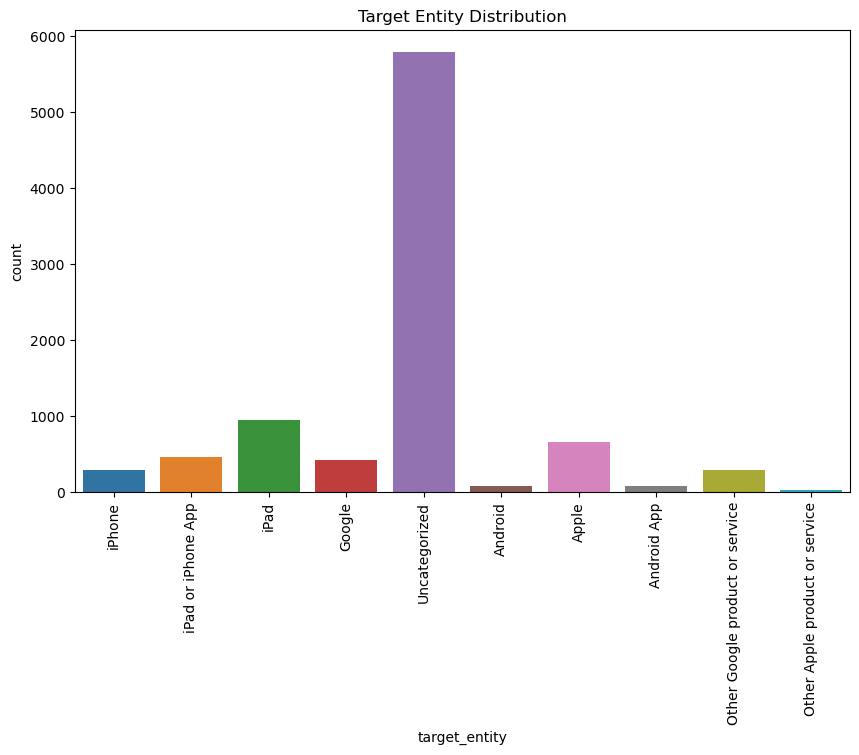

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Target Entity Distribution')
plt.xticks(rotation = 90)
plt.xlabel('Target Entity')
plt.ylabel('Frequency')
sns.countplot(x='target_entity', data=df);

With the uncategorized, we remember that that was what we placed on all empty entries in the column. But apart from it, ipad, Apple and Google are the most frequent entered target entries. We then check on the emotion column to see the reception of the target entities based on the tweets

In [31]:
df['emotion'].value_counts()

emotion
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

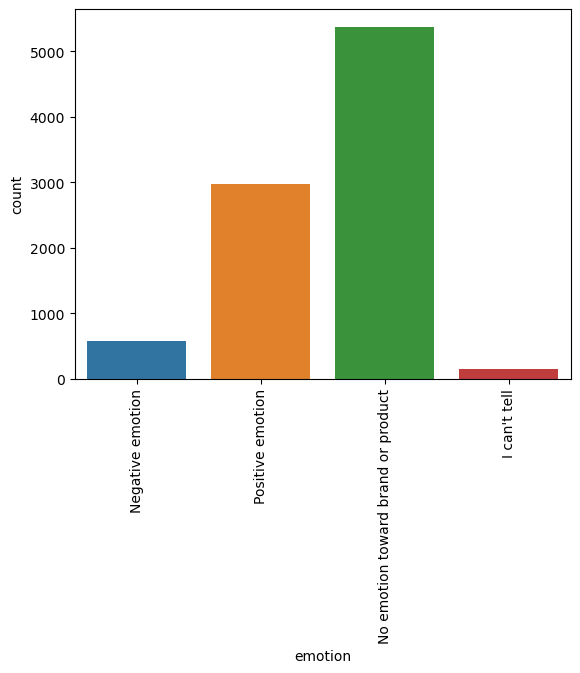

In [32]:
#Countplot for tweet column
import seaborn as sns
plt.xticks(rotation = 90)
sns.countplot(x='emotion', data=df)

## MODELLING

We will be using different types of models that is Naive Bayes,Logistic Regression, Decision Tree, and Deep Learning models to see how well they can predict the emotions in the tweets. To check how good they are, we will use the metric of accuracy to see how the model works.

### Vectorization
converting text data (which is unstructured) into a numerical format that machine learning models will understand and process. It will involve transforming text into numerical vectors that capture the semantic and syntactic information of the text.

#### Tfidf Vectorization (Term Frequency - Inverse Document Frequency)
Term Frequency-Inverse Document Frequency, is a technique that combines two metrics: TF (Term Frequency) and IDF (Inverse Document Frequency). It's particularly useful when working with multiple documents. TF-IDF helps us identify words that are unique and provide more meaningful insights within a document by giving higher importance to rare words and lowering the importance of common words found across all documents.

we will divide our dataset into two portions: training and testing. This helps us ensure that our models perform well on new, unseen data. We allocate 20% of the data for testing.

In [33]:
# import library
from sklearn.preprocessing import LabelEncoder

# Join the lemmatized words back into sentences
df['lemmatized_tweet'] = df['lemmatized_tweet'].apply(lambda x: ' '.join(x))
#texts will be my X
#labels will be my y
# Extract relevant columns
#independent variabe
X = df['lemmatized_tweet']
#target variable
y = df['emotion']

# Encode labels
#label_encoder = LabelEncoder()
#labels_encoded = label_encoder.fit_transform(labels)
#labels_encoded = to_categorical(labels_encoded)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer()

# Fit the vectorizer
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

## 1. Building a baseline Naive Bayes model

In [35]:
# Instantiate a MultinomialNB classifier with default params
baseline_nb = MultinomialNB()

# Fit the model
baseline_nb.fit(X_train_tf, y_train)

# Predict on the training set
y_train_pred = baseline_nb.predict(X_train_tf)

# Predict on the test set
y_test_pred = baseline_nb.predict(X_test_tf)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.7453142227122381
0.6686879823594267


### Classification Report

In [36]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()
    
    return report

In [37]:
# calling the function to get classifification report values
nb_report = generate_classification_report(y_test, y_test_pred)
nb_report

,precision,recall,f1-score,support
I can't tell,0.000000,0.000000,0.000000,33.000000
Negative emotion,1.000000,0.016807,0.033058,119.000000
No emotion toward brand or product,0.669654,0.945750,0.784108,1106.000000
Positive emotion,0.660000,0.296763,0.409429,556.000000
accuracy,0.668688,0.668688,0.668688,0.668688
macro avg,0.582414,0.314830,0.306649,1814.000000
weighted avg,0.676184,0.668688,0.605733,1814.000000


* Precision: A higher precision indicates that the model has a low rate of false positives for that class. Class Negative emotion has a higher precision than the other classes, suggesting that the model is better at predicting class Negative emotion than the rest.

* Recall: Recall represents the model's ability to correctly identify positive instances. Class No emotion toward brand or product has a higher recall than the other classes, suggesting that the model is better at predicting class No emotion toward brand or product than the rest.

* F1-Score:  The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class No emotion toward brand or product has a higher F1-score than class the rest.

* Accuracy: The accuracy of the model is 0.668688, which indicates the proportion of correctly predicted instances out of the total number of instances.

Hence the Naive Bayes model has 66.9% prediction accuracy of test data

Based on these metrics, it appears that the model performs relatively well

### Evaluation Metrics

In [38]:
#creating a function for checking for metrics 
from sklearn.metrics import ConfusionMatrixDisplay
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

{'accuracy_train': 0.7453142227122381,
 'accuracy_test': 0.6686879823594267,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1617b304250>}

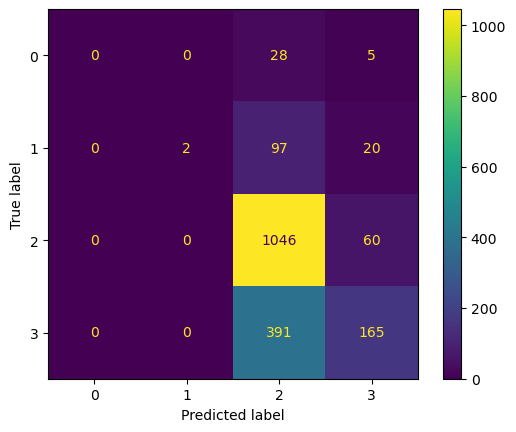

In [39]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(baseline_nb, X_train_tf,y_train, X_test_tf, y_test)

* accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.7453142227122381 indicates that the model achieves a high level of accuracy on the training data.

* accuracy_test: A value of 0.6686879823594267 suggests that the model does not perform very well on the testing data, indicating that it doesn't generalize well and is overfitting.

In summary, the model achieves a training accuracy of approximately 74.5% and a testing accuracy of around 66.9%. This indicates that the model performs relatively well in predicting the class labels for both the training and testing datasets.

## Logistic Regression

In [40]:
#import library
from sklearn.linear_model import LogisticRegression
# Create an instance of the LogisticRegression model
log_reg = LogisticRegression()
# Fit the model
log_reg.fit(X_train_tf, y_train)

# Predict on the training set
y_train_pred = log_reg.predict(X_train_tf)

# Predict on the test set
y_test_pred = log_reg.predict(X_test_tf)

In [41]:
# calling the function to get classifification report values
log_reg_report = generate_classification_report(y_test, y_test_pred)
log_reg_report

,precision,recall,f1-score,support
I can't tell,0.000000,0.000000,0.000000,33.000000
Negative emotion,0.733333,0.092437,0.164179,119.000000
No emotion toward brand or product,0.718563,0.867993,0.786241,1106.000000
Positive emotion,0.609071,0.507194,0.553484,556.000000
accuracy,0.690739,0.690739,0.690739,0.690739
macro avg,0.515242,0.366906,0.375976,1814.000000
weighted avg,0.672900,0.690739,0.659789,1814.000000


* Precision: A higher precision indicates that the model has a low rate of false positives for that class. Class Negative emotion has a higher precision than the other classes, suggesting that the model is better at predicting class Negative emotion than the rest.

* Recall: Recall represents the model's ability to correctly identify positive instances. Class No emotion toward brand or product has a higher recall than the other classes, suggesting that the model is better at predicting class No emotion toward brand or product than the rest.

* F1-Score:  The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class No emotion toward brand or product has a higher F1-score than class the rest.

* Accuracy: The accuracy of the model is 0.690739, which indicates the proportion of correctly predicted instances out of the total number of instances.

Hence the Logistic Regression model has 69.07% prediction accuracy of test data

Based on these metrics, it appears that the model performs relatively well compared to the base model

{'accuracy_train': 0.8031973539140022,
 'accuracy_test': 0.6907386990077178,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1617224e490>}

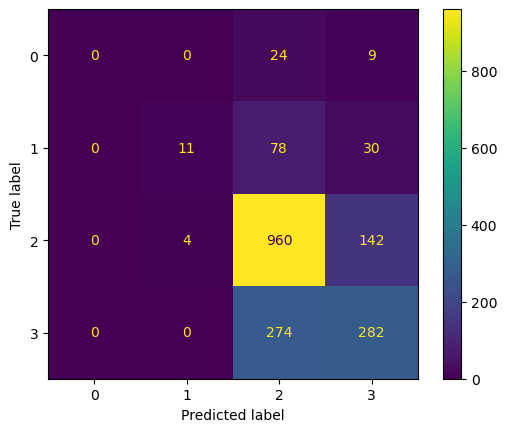

In [42]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(log_reg, X_train_tf,y_train, X_test_tf, y_test)

* accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.8031973539140022 indicates that the model achieves a high level of accuracy on the training data.

* accuracy_test: A value of 0.6907386990077178 suggests that the model does not perform very well on the testing data, indicating that it doesn't generalize well and is overfitting.

In summary, the model achieves a training accuracy of approximately 80.3% and a testing accuracy of around 69.1%. This indicates that the model performs relatively well in predicting the class labels for both the training and testing datasets.

## Decision Tree

In [43]:
# import library
from sklearn.tree import DecisionTreeClassifier
# Instatiate class
model_dt = DecisionTreeClassifier()
# Fit the model
model_dt.fit(X_train_tf, y_train)

# Predict on the training set
y_train_pred = model_dt.predict(X_train_tf)

# Predict on the test set
y_test_pred = model_dt.predict(X_test_tf)

In [44]:
# calling the function to get classifification report values
model_dt_report = generate_classification_report(y_test, y_test_pred)
model_dt_report

,precision,recall,f1-score,support
I can't tell,0.153846,0.060606,0.086957,33.000000
Negative emotion,0.273810,0.193277,0.226601,119.000000
No emotion toward brand or product,0.702262,0.701627,0.701945,1106.000000
Positive emotion,0.470588,0.517986,0.493151,556.000000
accuracy,0.600331,0.600331,0.600331,0.600331
macro avg,0.400127,0.368374,0.377163,1814.000000
weighted avg,0.593170,0.600331,0.595578,1814.000000


* Precision: A higher precision indicates that the model has a low rate of false positives for that class. Class No emotion toward brand or product has a higher precision than the other classes, suggesting that the model is better at predicting class No emotion toward brand or product than the rest.

* Recall: Recall represents the model's ability to correctly identify positive instances. Class No emotion toward brand or product has a higher recall than the other classes, suggesting that the model is better at predicting class No emotion toward brand or product than the rest.

* F1-Score:  The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class No emotion toward brand or product has a higher F1-score than class the rest.

* Accuracy: The accuracy of the model is 0.668688, which indicates the proportion of correctly predicted instances out of the total number of instances.

Hence the Decision Tree model has 60.0% prediction accuracy of test data

Based on these metrics, it appears that the model performs poorly compared to the previous models

{'accuracy_train': 0.9950385887541345,
 'accuracy_test': 0.603638368246968,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1617ba0c150>}

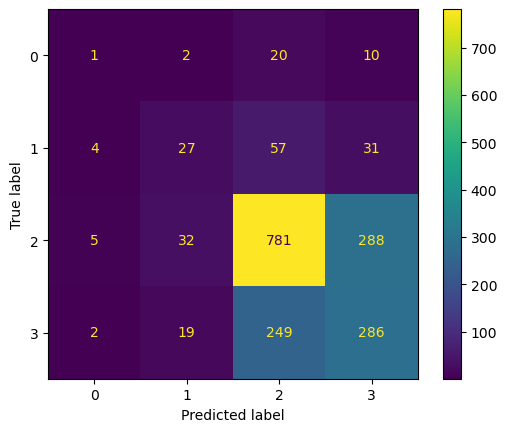

In [45]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(model_dt, X_train_tf,y_train, X_test_tf, y_test)

* accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.9950385887541345 indicates that the model achieves a high level of accuracy on the training data.

* accuracy_test: A value of 0.5986769570011026 suggests that the model does not perform very well on the testing data, indicating that it doesn't generalize well and is really overfitting.

In summary, the model achieves a training accuracy of approximately 99.5% and a testing accuracy of around 59.9%. This indicates that the model performs poorly in predicting the class labels for testing datasets.

## Support vector machine

In [46]:
#import library
from sklearn.svm import SVC
# Instantiate support vector classifier
svc = SVC()

# Fit the model
svc.fit(X_train_tf, y_train)

# Predict on the training set
y_train_pred = svc.predict(X_train_tf)

# Predict on the test set
y_test_pred = svc.predict(X_test_tf)

In [47]:
# calling the function to get classifification report values
svc_report = generate_classification_report(y_test, y_test_pred)
svc_report

,precision,recall,f1-score,support
I can't tell,0.000000,0.000000,0.000000,33.000000
Negative emotion,0.782609,0.151261,0.253521,119.000000
No emotion toward brand or product,0.725877,0.897830,0.802749,1106.000000
Positive emotion,0.666667,0.507194,0.576098,556.000000
accuracy,0.712789,0.712789,0.712789,0.712789
macro avg,0.543788,0.389071,0.408092,1814.000000
weighted avg,0.698245,0.712789,0.682646,1814.000000


* Precision: A higher precision indicates that the model has a low rate of false positives for that class. Class Negative emotion has a higher precision than the other classes, suggesting that the model is better at predicting class Negative emotion than the rest.

* Recall: Recall represents the model's ability to correctly identify positive instances. Class No emotion toward brand or product has a higher recall than the other classes, suggesting that the model is better at predicting class No emotion toward brand or product than the rest.

* F1-Score:  The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class No emotion toward brand or product has a higher F1-score than class the rest.

* Accuracy: The accuracy of the model is 0.712789, which indicates the proportion of correctly predicted instances out of the total number of instances.

Hence the Support Vector Classifier has 71.3% prediction accuracy of test data

Based on these metrics, it appears that the model performs relatively well compared to all the previous models.

{'accuracy_train': 0.8886438809261301,
 'accuracy_test': 0.7127894156560088,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1617ba2b410>}

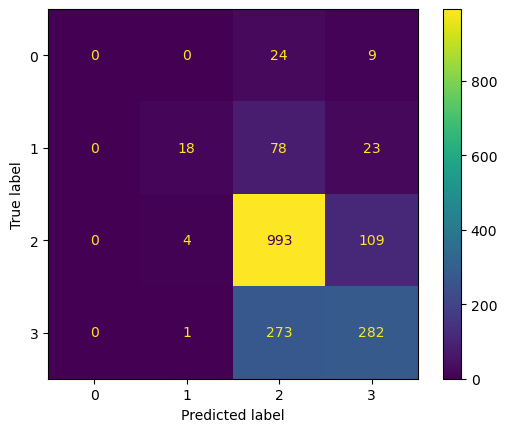

In [48]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(svc, X_train_tf,y_train, X_test_tf, y_test)

* accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.8886438809261301 indicates that the model achieves a high level of accuracy on the training data.

* accuracy_test: A value of 0.7127894156560088 suggests that the model does not perform very well on the testing data, indicating that it doesn't generalize well and is a bit overfitting.

In summary, the model achieves a training accuracy of approximately 88.9% and a testing accuracy of around 71.3%. This indicates that the model performs relatively well in predicting the class labels for both the training and testing datasets.

We go ahead to look at how our data behaves with other models in deep learning.

## DEEP LEARNING

We are going to explore deep learning models. We will use the following models:

* LSTM (Long Short Term Memory) For this model, we will use the Bidirectional LSTM layer to capture both past and future context. We will also add a dropout layer to prevent overfitting. After that, we will add another bidirectional LSTM layer and another dropout layer. Finally, we will add a Dense layer with a softmax activation function to output the probabilities for each class.
* CNN (Convolutional Neural Network) For this model, we will use a 1D convolutional layer with a ReLU activation function followed by a global max pooling layer to capture the most important features. After that, we will add a Dense layer with a softmax activation function to output the probabilities for each class.
* GRU (Gated Recurrent Unit) For this model, we will use a bidirectional GRU layer with a dropout layer to prevent overfitting.After that, we will add a Dense layer with a softmax activation function to output the probabilities for each class.We will create a class that will help us to define our models and also calculate their weights in regards to the dataset we have.

We will create a class that will help us to define our models and also calculate their weights in regards to the dataset we have.

In [49]:
pip install tensorflow

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, GRU
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.utils.class_weight import compute_class_weight


In [51]:
class ModelBuilder:
    def __init__(self, model_type, input_dim, output_dim, input_length, num_classes):
        self.model = self.build_model(model_type, input_dim, output_dim, input_length, num_classes)

    def build_model(self, model_type, input_dim, output_dim, input_length, num_classes):
        model = Sequential()
        model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

        if model_type == 'LSTM':
            model.add(Bidirectional(LSTM(64, return_sequences=True)))
            model.add(Dropout(0.5))
            model.add(Bidirectional(LSTM(32)))
        elif model_type == 'CNN':
            model.add(Conv1D(128, 5, activation='relu'))
            model.add(GlobalMaxPooling1D())
            model.add(Dense(32, activation='relu'))
        elif model_type == 'GRU':
            model.add(Bidirectional(GRU(64, return_sequences=True)))
            model.add(Dropout(0.5))
            model.add(Bidirectional(GRU(32)))

        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X_train, y_train, epochs=10, batch_size=32, validation_split=0.2):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_train_pred = np.argmax(self.predict(X_train), axis=1)
        y_test_pred = np.argmax(self.predict(X_test), axis=1)

        y_train_true = np.argmax(y_train, axis=1)
        y_test_true = np.argmax(y_test, axis=1)

        accuracy_train = accuracy_score(y_train_true, y_train_pred)
        accuracy_test = accuracy_score(y_test_true, y_test_pred)
        f1_test = f1_score(y_test_true, y_test_pred, average='weighted')
        class_report_test = classification_report(y_test_true, y_test_pred)
        matrix_test = confusion_matrix(y_test_true, y_test_pred)

        evaluation_results = {
            'train': {
                'accuracy': accuracy_train
            },
            'test': {
                'accuracy': accuracy_test,
                'f1_score': f1_test,
                'classification_report': class_report_test,
                'confusion_matrix': matrix_test
            }
        }
        return evaluation_results

In [52]:
# Extract relevant columns
texts = df['lemmatized_tweet'].values
labels = df['emotion'].values

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded = to_categorical(labels_encoded)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(texts, labels_encoded, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [53]:
# Parameters
input_dim = max_words
output_dim = 100
input_length = max_len
num_classes = labels_encoded.shape[1]

# LSTM Model
print("Training LSTM model...")
lstm_model_builder = ModelBuilder('LSTM', input_dim, output_dim, input_length, num_classes)
lstm_model_builder.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)
lstm_results = lstm_model_builder.evaluate(X_train_padded, y_train, X_test_padded, y_test)
print("LSTM Results:")
print("Train Accuracy:", lstm_results['train']['accuracy'])
print("Test Accuracy:", lstm_results['test']['accuracy'])
print("F1 Score:", lstm_results['test']['f1_score'])
print("Classification Report:\n", lstm_results['test']['classification_report'])
print("Confusion Matrix:\n", lstm_results['test']['confusion_matrix'])

# CNN Model
print("Training CNN model...")
cnn_model_builder = ModelBuilder('CNN', input_dim, output_dim, input_length, num_classes)
cnn_model_builder.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)
cnn_results = cnn_model_builder.evaluate(X_train_padded, y_train, X_test_padded, y_test)
print("CNN Results:")
print("Train Accuracy:", cnn_results['train']['accuracy'])
print("Test Accuracy:", cnn_results['test']['accuracy'])
print("F1 Score:", cnn_results['test']['f1_score'])
print("Classification Report:\n", cnn_results['test']['classification_report'])
print("Confusion Matrix:\n", cnn_results['test']['confusion_matrix'])

# GRU Model
print("Training GRU model...")
gru_model_builder = ModelBuilder('GRU', input_dim, output_dim, input_length, num_classes)
gru_model_builder.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)
gru_results = gru_model_builder.evaluate(X_train_padded, y_train, X_test_padded, y_test)
print("GRU Results:")
print("Train Accuracy:", gru_results['train']['accuracy'])
print("Test Accuracy:", gru_results['test']['accuracy'])
print("F1 Score:", gru_results['test']['f1_score'])
print("Classification Report:\n", gru_results['test']['classification_report'])
print("Confusion Matrix:\n", gru_results['test']['confusion_matrix'])

Training LSTM model...
Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - accuracy: 0.5291 - loss: 1.0750 - val_accuracy: 0.5930 - val_loss: 0.9055
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.6136 - loss: 0.8831 - val_accuracy: 0.6288 - val_loss: 0.8224
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.7648 - loss: 0.6364 - val_accuracy: 0.6536 - val_loss: 0.8446
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 159ms/step - accuracy: 0.8317 - loss: 0.4784 - val_accuracy: 0.6501 - val_loss: 1.0213
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 23s 125ms/step - accuracy: 0.8683 - loss: 0.3777 - val_accuracy: 0.6598 - val_loss: 1.0585
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.8803 - loss: 0.3250 - val_accuracy: 0.6288 - val_loss: 1.1899
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 160ms/step - accuracy: 0.9003 - loss: 0.2777 - val_accuracy: 0.6419 - val_loss: 1.4799
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step - acc

### Observations:

The classes:

0. - I can't tell
1. - Negative emotion
2. - No emotion
3. - positive emotion

#### Training Accuracy:

CNN achieved the highest training accuracy (0.9111), suggesting possible overfitting.

GRU (0.8694) and LSTM (0.8699) also performed well but lower than CNN.

#### Test Accuracy:

LSTM (0.6554) outperformed CNN (0.6317) and GRU (0.65) in generalization to unseen data.

#### Precision

Class negative :
GRU: 0.37 
CNN: 0.43 (highest)
LSTM: 0.33 (lowest)

Class No emotion :
All models showed similar precision (CNN: 0.75, LSTM: 0.73, GRU: 0.72), with CNN marginally better.

Class Positive :
GRU had the highest precision (0.57), followed by LSTM (0.55) and CNN (0.50).

#### Recall

Class negative :
GRU had the highest recall (0.36) , followed by LSTM (0.32) and CNN (0.34).

Class No emotion :
GRU excelled in recall (0.80), followed by CNN (0.68) and LSTM (0.78).

Class positive :
CNN had the highest recall CNN (0.63) , followed by LSTM (0.52) and GRU (0.45).

We will try balancing the classes using SMOTE to see if the accuracy will improve significantly.

In [54]:
# Resample the training set using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train)

# Compute class weights
y_train_resampled_labels = np.argmax(y_train_resampled, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled_labels), y=y_train_resampled_labels)
class_weights_dict = dict(enumerate(class_weights))

# Build and train the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights_dict)

# Evaluate the model
y_train_pred = np.argmax(model.predict(X_train_padded), axis=1)
y_test_pred = np.argmax(model.predict(X_test_padded), axis=1)

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

accuracy_train = accuracy_score(y_train_true, y_train_pred)
accuracy_test = accuracy_score(y_test_true, y_test_pred)
f1_test = f1_score(y_test_true, y_test_pred, average='weighted')
class_report_test = classification_report(y_test_true, y_test_pred)
matrix_test = confusion_matrix(y_test_true, y_test_pred)

evaluation_results = {
    'train': {
        'accuracy': accuracy_train
    },
    'test': {
        'accuracy': accuracy_test,
        'f1_score': f1_test,
         'classification_report': class_report_test,
        'confusion_matrix': matrix_test
    }
}

print("Evaluation Results:", evaluation_results)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 67s 131ms/step - accuracy: 0.4088 - loss: 1.2675 - val_accuracy: 0.0398 - val_loss: 2.0941
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 52s 122ms/step - accuracy: 0.5812 - loss: 0.9476 - val_accuracy: 0.0667 - val_loss: 2.7746
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 53s 124ms/step - accuracy: 0.6654 - loss: 0.7765 - val_accuracy: 0.1235 - val_loss: 3.0490
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 56s 130ms/step - accuracy: 0.7188 - loss: 0.6576 - val_accuracy: 0.1654 - val_loss: 3.5146
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 55s 129ms/step - accuracy: 0.7605 - loss: 0.5690 - val_accuracy: 0.1874 - val_loss: 4.4192
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 83s 130ms/step - accuracy: 0.8187 - loss: 0.4617 - val_accuracy: 0.2029 - val_loss: 5.2489
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.8571 - loss: 0.3946 - val_accuracy: 0.2169 - val_loss: 6.0635
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 55s 128ms/step - accuracy: 0.8790 - loss: 0

The accuracy of the model did not improve even after doing resampling using SMOTE.

## Conlusion
Based on the evaluation metrics (accuracy, classification reports), the Support Vector Classifier outperformed other models with the highest test accuracy. This model was selected as the final model for predicting emotions.The following are the results of the metrics used during the modeling:

Support Vector Classifier

Train Accuracy: 0.88

Test Accuracy: 0.72

This model can help target entities identify emotions whether positive negative or neutral.